## Michelson's speed of light experiment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('michelson_speed_of_light.csv', index_col=0)
df.head()

,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


## Checking Normality of Michelson data

In [8]:
mean = np.mean(df['velocity of light in air (km/s)'])
std = np.std(df['velocity of light in air (km/s)'])
samples = np.random.normal(mean, std, size=10000)

In [9]:
# ECDF(Empirical cumulative distribution function)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [10]:
x, y = ecdf(df['velocity of light in air (km/s)'])

In [12]:
x_theor, y_theor = ecdf(samples)

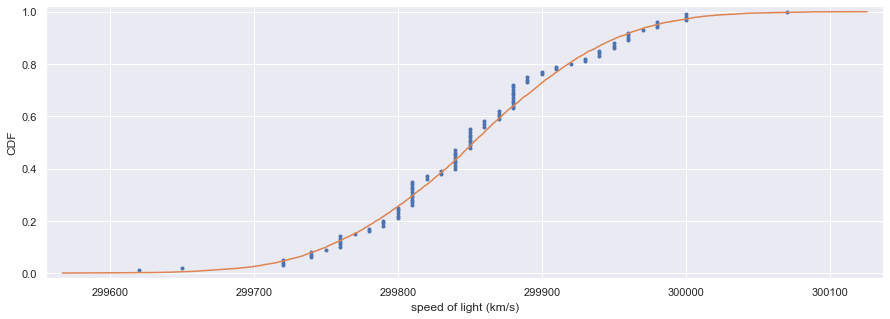

In [15]:
sns.set()

# Plot the ECDF with labeled axes
plt.figure(figsize=(15, 5))
plt.plot(x, y, marker='.', linestyle='none')
plt.plot(x_theor, y_theor)
plt.xlabel('speed of light (km/s)')
plt.ylabel('CDF')
plt.margins(0.02)  # Keeps data of plot edges

# Show the plot
plt.show()

## Exercise: The Normal PDF

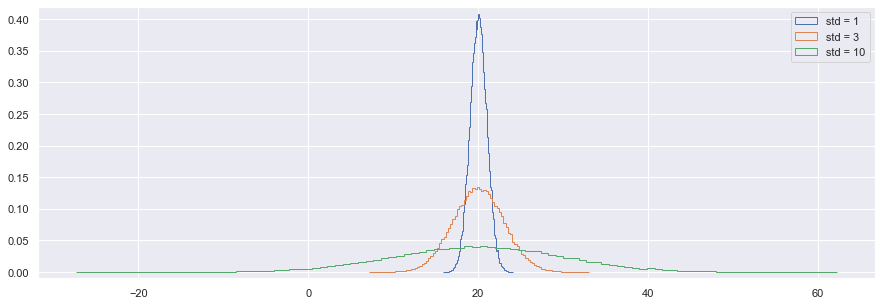

In [19]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, 100000)
samples_std3 = np.random.normal(20, 3, 100000)
samples_std10 = np.random.normal(20, 10, 100000)

# Make histograms
plt.figure(figsize=(15, 5))
plt.hist(samples_std1, histtype='step', density=True, bins=100)
plt.hist(samples_std3, histtype='step', density=True, bins=100)
plt.hist(samples_std10, histtype='step', density=True, bins=100)

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

## Exercize: The Normal CDF

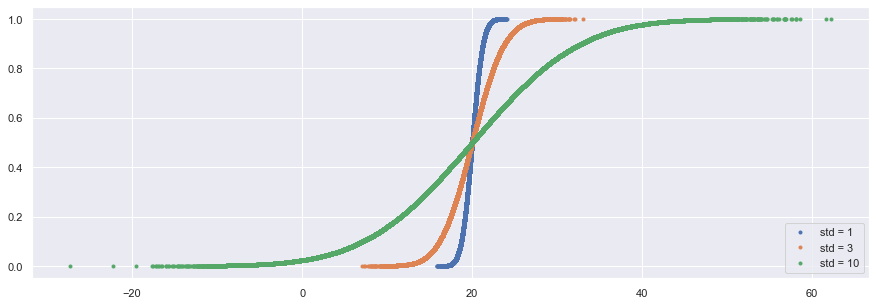

In [20]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.figure(figsize=(15, 5))
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

## Exercise: Are the Belmont Stakes results Normally distributed?
 - Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. 
 - Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. 
 - With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. 
 - Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. 
 - Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

In [41]:
belmont = pd.read_csv('belmont.csv')
belmont.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5


In [42]:
belmont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     91 non-null     int64  
 1   Winner   91 non-null     object 
 2   Jockey   91 non-null     object 
 3   Trainer  91 non-null     object 
 4   Owner    91 non-null     object 
 5   Time     91 non-null     object 
 6   Track    91 non-null     object 
 7   miles    91 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 5.8+ KB


In [94]:
belmont['newtime'] = pd.to_datetime(belmont['Time'], format='%M:%S.%f')

In [96]:
belmont['newtime'] = belmont['newtime'].apply(lambda x: x.minute * 60 + x.second + x.microsecond/1000000)

In [97]:
belmont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     91 non-null     int64  
 1   Winner   91 non-null     object 
 2   Jockey   91 non-null     object 
 3   Trainer  91 non-null     object 
 4   Owner    91 non-null     object 
 5   Time     91 non-null     object 
 6   Track    91 non-null     object 
 7   miles    91 non-null     float64
 8   newtime  91 non-null     float64
dtypes: float64(2), int64(1), object(6)
memory usage: 6.5+ KB


In [98]:
belmont.shape

(91, 9)

In [99]:
belmont[~belmont['Year'].isin([1970, 1973])]

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles,newtime
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5,148.51
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5,146.65
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5,148.52
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5,150.70
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5,150.42
...,...,...,...,...,...,...,...,...,...
86,1930,Gallant Fox,Earl Sande,Jim Fitzsimmons,Belair Stud,2:31.60,Belmont,1.5,151.60
87,1929,Blue Larkspur,Mack Garner,Herbert J. Thompson,Edward R. Bradley,2:32.80,Belmont,1.5,152.80
88,1928,Vito,Clarence Kummer,Max Hirsch,Alfred H. Cosden,2:33.20,Belmont,1.5,153.20
89,1927,Chance Shot,Earl Sande,Pete Coyne,Joseph E. Widener,2:32.40,Belmont,1.5,152.40


In [103]:
belmont_no_outliers = belmont[~belmont['Year'].isin([1970, 1973])]['newtime'].values
belmont_no_outliers

array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

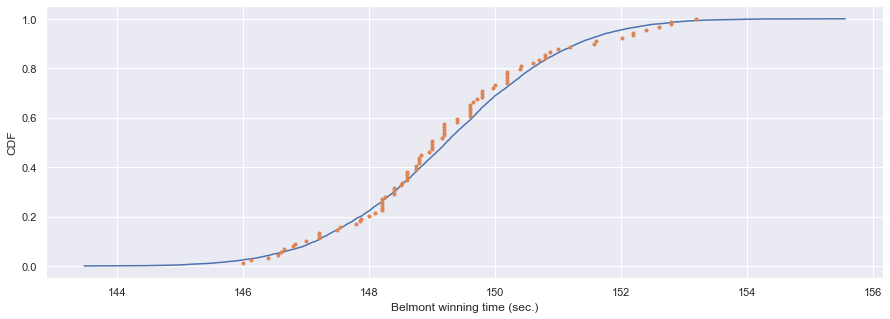

In [104]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
plt.figure(figsize=(15, 5))
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Belmont winning time (sec.)')
plt.ylabel('CDF')
plt.show()

## Exercise: What are the chances of a horse matching or beating Secretariat's record?
 - Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [105]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, 1_000_000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples < 144) / 1_000_000

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000595


## Exercise: If you have a story, you can simulate it!
 - Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

 - In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle, when a batter gets all four kinds of hits in a single game, is another rare baseball event. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

 - How long must we wait to see a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes in succession? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

 - Now, you will write a function to sample out of the distribution described by this story.

In [106]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(np.mean(tau1), size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(np.mean(tau2), size)

    return t1 + t2

## Exercise: Distribution of no-hitters and cycles

 - Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

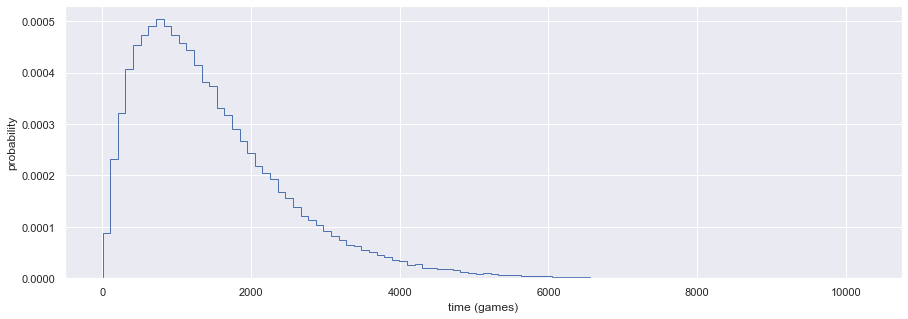

In [108]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100_000)

# Make the histogram
plt.figure(figsize=(15, 5))
plt.hist(waiting_times, bins=100, density=True, histtype='step')

# Label axes
plt.xlabel('time (games)')
plt.ylabel('probability')

# Show the plot
plt.show()